<a href="https://colab.research.google.com/github/Ulukele/nsu-matstat/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

In [ ]:
# Для более подробного аналиа графиков
from google.colab import output
output.enable_custom_widget_manager()

## Data

In [ ]:
data_1 = [
        1.319, 0.913, 0.689, 2.036, 3.621, 3.201, 3.984, 1.456, 1.551, 1.116,
        2.906, 4.224, 2.373, 2.378, 2.451, 0.348, 2.456, 1.993, -0.561, 2.544
        ]

In [ ]:
data_2 = [
          0.437, 3.138, 2.045, 2.638, 3.582, 1.273, 2.55, 1.538, 2.354, 2.755,
          -0.410, 1.516, 2.203, 1.681, 1.793, 2.569, 2.675, 2.592, 2.803, 1.975,
          0.59, 1.401, -0.105, 4.274, 2.307, 3.103, 0.333, 1.292, 3.284, 1.795
]

In [ ]:
data_3 = [
          0.595, 0.456, 0.51, 0.242, 0.967, 0.005, 0.939, 0.918, 0.634, 0.961,
          0.815, 0.728, 0.63, 0.593, 0.728, 0.619, 0.375, 0.1, 0.954, 0.04,
          0.256, 0.968, 0.379, 0.55, 0.417, 0.33, 0.549, 0.959, 0.103, 0.163
]

## Task 1

In [ ]:
import scipy.stats

In [ ]:
data = np.array(data_1 + data_2)
interval_values = [0.01, 0.05, 0.1]
data

array([ 1.319,  0.913,  0.689,  2.036,  3.621,  3.201,  3.984,  1.456,
        1.551,  1.116,  2.906,  4.224,  2.373,  2.378,  2.451,  0.348,
        2.456,  1.993, -0.561,  2.544,  0.437,  3.138,  2.045,  2.638,
        3.582,  1.273,  2.55 ,  1.538,  2.354,  2.755, -0.41 ,  1.516,
        2.203,  1.681,  1.793,  2.569,  2.675,  2.592,  2.803,  1.975,
        0.59 ,  1.401, -0.105,  4.274,  2.307,  3.103,  0.333,  1.292,
        3.284,  1.795])

In [ ]:
n = data.size
mean = data.mean()
S_2 = ((data - mean)** 2).mean()
mean, S_2

(2.0195800000000004, 1.2659882835999998)

In [ ]:
# a)

sigma = math.sqrt(1.1)

def d_interval(e_):
  t_ = scipy.stats.norm.ppf(1 - e_ / 2)
  left = mean - sigma * t_ / math.sqrt(n)
  right = mean + sigma * t_ / math.sqrt(n)
  return left, right

for inter_value in interval_values:
  print(f"Доверительный интервал (уровня {1 - inter_value}): ", d_interval(inter_value))

Доверительный интервал (уровня 0.99):  (1.6375227723200798, 2.401637227679921)
Доверительный интервал (уровня 0.95):  (1.7288703612618417, 2.3102896387381593)
Доверительный интервал (уровня 0.9):  (1.775608780406174, 2.2635512195938268)


In [ ]:
# б)

S_0 = math.sqrt(n * S_2 / (n - 1))

def d_interval(e_):
  t_ = scipy.stats.t.ppf(1 - e_ / 2, n - 1)
  left = mean - t_ * S_0 / math.sqrt(n)
  right = mean + t_ * S_0 / math.sqrt(n)
  return left, right

for inter_value in interval_values:
  print(f"Доверительный интервал (уровня {1 - inter_value}): ", d_interval(inter_value))


Доверительный интервал (уровня 0.99):  (1.5888116224760844, 2.450348377523916)
Доверительный интервал (уровня 0.95):  (1.6965662028161208, 2.3425937971838797)
Доверительный интервал (уровня 0.9):  (1.7500956530221194, 2.2890643469778813)


In [ ]:
# в)

alpha = 2
sum_quadr = ((data - alpha) ** 2).sum()

def d_interval(e_):
  t_1_ = scipy.stats.chi2.ppf(e_ / 2, n)
  t_2_ = scipy.stats.chi2.ppf(1 - e_ / 2, n)

  left = sum_quadr / t_2_
  right = sum_quadr / t_1_
  return left, right

for inter_value in interval_values:
  print(f"Доверительный интервал (уровня {1 - inter_value}): ", d_interval(inter_value))


Доверительный интервал (уровня 0.99):  (0.7965605755752314, 2.2621253651440454)
Доверительный интервал (уровня 0.95):  (0.8865641270478684, 1.9568523442005683)
Доверительный интервал (уровня 0.9):  (0.9379862892212133, 1.8213705152195017)


In [ ]:
# г)

n_mean_quadr = n * S_2

def d_interval(e_):
  t_1_ = scipy.stats.chi2.ppf(e_ / 2, n - 1)
  t_2_ = scipy.stats.chi2.ppf(1 - e_ / 2, n - 1)
  left = n_mean_quadr / t_2_
  right = n_mean_quadr / t_1_
  return left, right

for inter_value in interval_values:
  print(f"Доверительный интервал (уровня {1 - inter_value}): ", d_interval(inter_value))


Доверительный интервал (уровня 0.99):  (0.8091376868256887, 2.322969771439006)
Доверительный интервал (уровня 0.95):  (0.9014132520539905, 2.0060079783411893)
Доверительный интервал (уровня 0.9):  (0.9541860629503212, 1.8655715893532943)


## Task 2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = np.array(sorted(data_3))
n = data.size
data

array([0.005, 0.04 , 0.1  , 0.103, 0.163, 0.242, 0.256, 0.33 , 0.375,
       0.379, 0.417, 0.456, 0.51 , 0.549, 0.55 , 0.593, 0.595, 0.619,
       0.63 , 0.634, 0.728, 0.728, 0.815, 0.918, 0.939, 0.954, 0.959,
       0.961, 0.967, 0.968])

In [ ]:

counts = lambda t: (data < t).sum()
empiric = lambda t: (data < t).sum() / n

x = np.linspace(-0.01, 1.01, 10000)
empiric_data = [empiric(x_) for x_ in x]
empiric_dots = [(x_, f"{counts(x_)} / {n}") for x_ in sorted(data)]
empiric_dots, n
for x_, val in empiric_dots:
  print(f"f( {x_} ) = {val}")

f( 0.005 ) = 0 / 30
f( 0.04 ) = 1 / 30
f( 0.1 ) = 2 / 30
f( 0.103 ) = 3 / 30
f( 0.163 ) = 4 / 30
f( 0.242 ) = 5 / 30
f( 0.256 ) = 6 / 30
f( 0.33 ) = 7 / 30
f( 0.375 ) = 8 / 30
f( 0.379 ) = 9 / 30
f( 0.417 ) = 10 / 30
f( 0.456 ) = 11 / 30
f( 0.51 ) = 12 / 30
f( 0.549 ) = 13 / 30
f( 0.55 ) = 14 / 30
f( 0.593 ) = 15 / 30
f( 0.595 ) = 16 / 30
f( 0.619 ) = 17 / 30
f( 0.63 ) = 18 / 30
f( 0.634 ) = 19 / 30
f( 0.728 ) = 20 / 30
f( 0.728 ) = 20 / 30
f( 0.815 ) = 22 / 30
f( 0.918 ) = 23 / 30
f( 0.939 ) = 24 / 30
f( 0.954 ) = 25 / 30
f( 0.959 ) = 26 / 30
f( 0.961 ) = 27 / 30
f( 0.967 ) = 28 / 30
f( 0.968 ) = 29 / 30


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

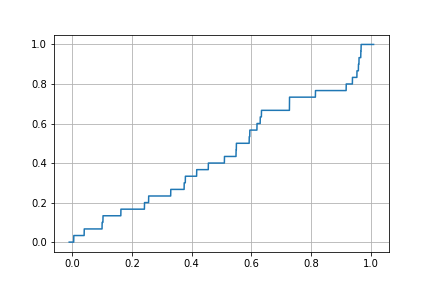

In [ ]:
%matplotlib widget

plt.plot(x, empiric_data)
plt.grid()
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

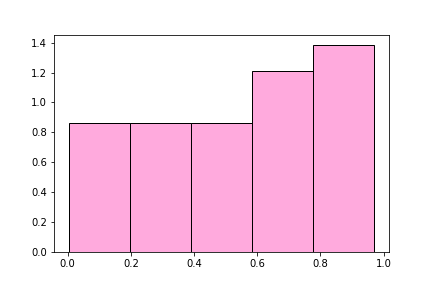

In [ ]:
%matplotlib widget

plt.hist(data, color = '#ffaadd', edgecolor = 'black', bins = 5, density = 1)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

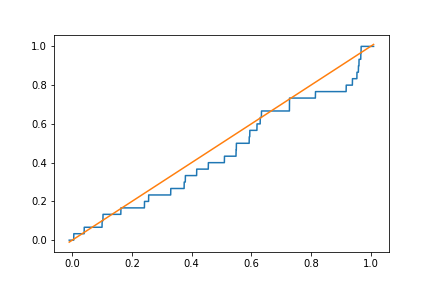

In [ ]:
# Критерий Колмогорова

%matplotlib widget

plt.plot(x, empiric_data)
plt.plot(x, x)

plt

In [ ]:
diverse = lambda t: abs(empiric(t) - t)

diverse_data = np.array([diverse(x_) for x_ in x])

diverse_argmax = diverse_data.argmax()

dn = diverse_data[diverse_argmax]
x_val = x[diverse_argmax]

print(f"Dn = {dn}. Dn*sqrt={dn * math.sqrt(n)} Достигается в x = {x_val}")

Dn = 0.15132013201320127. Dn*sqrt=0.8288144970828996 Достигается в x = 0.917986798679868


In [ ]:
e = 0.2
q = scipy.stats.kstwobign.ppf(1 - e)

if (math.sqrt(n) * dn < q):
  print('Гипотеза принимается')
else:
  print('Гипотеза не принимается')
math.sqrt(n) * dn, q 

Гипотеза принимается


(0.8288144970828996, 1.072749174939648)

In [ ]:
# Критерий Хи квадрат

deltas_num = 5
deltas = np.linspace(0, 1, deltas_num)
p = deltas[1] - deltas[0]

v = np.array([
     np.count_nonzero((delta <= data) & (data <= delta + p))
     for delta in deltas[:-1]
     ])

d_data = ((v - n * p) ** 2) / (n * p)
d = d_data.sum()

c = scipy.stats.chi2.ppf(1 - e, v.size)

if (d < c):
  print('Гипотеза принимается')
else:
  print('Гипотеза не принимается')

d, c

Гипотеза принимается


(1.4666666666666668, 5.9886166940042465)

## Task 3

In [ ]:
data_a = np.array(data_1)
data_b = np.array(data_2)

In [ ]:
# а)

mean_a = data_a.mean()
mean_b = data_b.mean()

S_a_2 = ((data_a - mean_a) ** 2).mean()
S_b_2 = ((data_b - mean_b) ** 2).mean()

e = 0.2

n_a = len(data_a)
n_b = len(data_b)

t_1 = scipy.stats.f.ppf(e / 2, n_a - 1, n_b -1)
t_2 = scipy.stats.f.ppf(1 - e / 2, n_a - 1, n_b -1)

k = (n_a * S_a_2  * (n_b - 1)) / (n_b * S_b_2  * (n_a - 1))

if ((k > t_1) and (k < t_2)):
  print('Гипотеза принимается')
else:
  print('Гипотеза не принимается')

mean_a, mean_b, k

Гипотеза принимается


(2.0499, 1.999366666666667, 1.2627551001596926)

In [ ]:
# б)

e = 0.2

q = scipy.stats.t.ppf(1 - e / 2, n_a + n_b - 2)  
psi = (mean_a - mean_b) / ((math.sqrt(1 / n_a + 1 / n_b)) * (math.sqrt((n_a * S_a_2 + n_b * S_b_2) / (n_a + n_b - 2))))

if ((psi > -q) and (psi < q)):
  print("Гипотеза принимается")
else:
  print("Гипотеза не принимается")

q, psi

Гипотеза принимается


(1.2994388784066297, 0.15247354225576804)